## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [99]:
data = pd.read_csv('QueryResults.csv', names=['date','tag', 'post'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [100]:
data.head(5)

,date,tag,post
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [9]:
data.info

<bound method DataFrame.info of                         m     TagName  Unnamed: 2
0     2008-07-01 00:00:00          c#           3
1     2008-08-01 00:00:00    assembly           8
2     2008-08-01 00:00:00  javascript         162
3     2008-08-01 00:00:00           c          85
4     2008-08-01 00:00:00      python         124
...                   ...         ...         ...
1986  2020-07-01 00:00:00           r        5694
1987  2020-07-01 00:00:00          go         743
1988  2020-07-01 00:00:00        ruby         775
1989  2020-07-01 00:00:00        perl         182
1990  2020-07-01 00:00:00       swift        3607

[1991 rows x 3 columns]>

In [13]:
data.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [93]:
data.count()

date    1992
tag     1992
post    1991
dtype: int64

**Challenge**: Count the number of entries in each column of the dataframe

In [17]:
data.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [94]:
data['tag'].nunique()

15

In [102]:
data.groupby('tag').sum()

,date,post
tag,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [103]:
data['date']=pd.to_datetime(data['date'])

In [104]:
data.head()

,date,tag,post
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [112]:
reshaped_data = data.pivot(index="date", columns="tag", values ="post")

In [113]:
reshaped_data

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [115]:
reshaped_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2008-07-01 to 2020-07-01
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   assembly    144 non-null    float64
 1   c           144 non-null    float64
 2   c#          145 non-null    float64
 3   c++         144 non-null    float64
 4   delphi      144 non-null    float64
 5   go          129 non-null    float64
 6   java        144 non-null    float64
 7   javascript  144 non-null    float64
 8   perl        144 non-null    float64
 9   php         144 non-null    float64
 10  python      144 non-null    float64
 11  r           142 non-null    float64
 12  ruby        144 non-null    float64
 13  swift       135 non-null    float64
dtypes: float64(14)
memory usage: 17.0 KB


In [124]:
reshaped_data.sum(axis=0)

tag
assembly        34852.0
c              336042.0
c#            1423530.0
c++            684210.0
delphi          46212.0
go              47499.0
java          1696403.0
javascript    2056510.0
perl            65286.0
php           1361988.0
python        1496210.0
r              356799.0
ruby           214582.0
swift          273055.0
dtype: float64

In [145]:
type(reshaped_data['python'])

pandas.core.series.Series

In [131]:
type(reshaped_data.isna().values)

numpy.ndarray

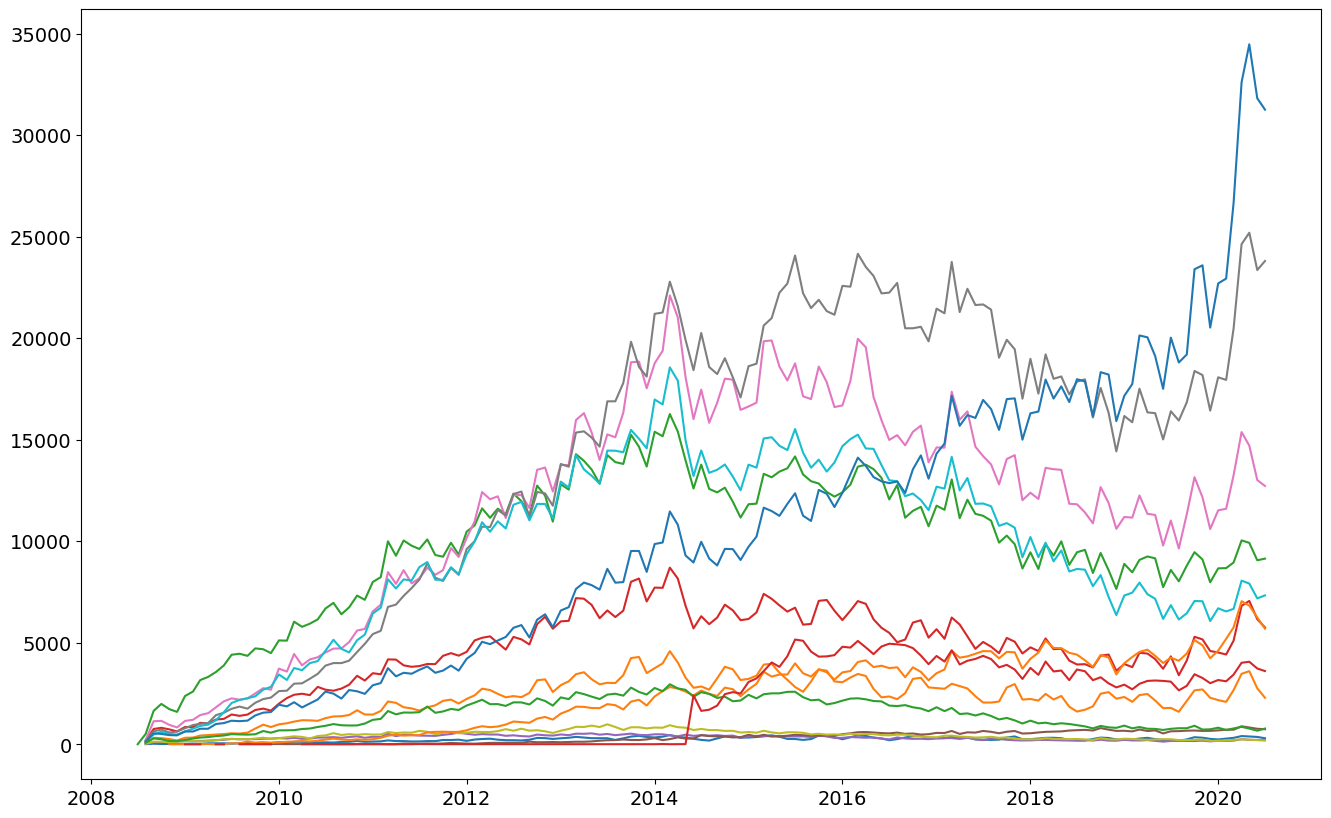

In [140]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize =14)
# plt.plot(reshaped_data.index, reshaped_data.java)
# plt.plot(reshaped_data.index, reshaped_data.python)

for tag in reshaped_data.columns:
    plt.plot(reshaped_data.index, reshaped_data[tag], label = reshaped_data[tag].name)

## Data Manipulation



In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   m           1991 non-null   object
 1   TagName     1991 non-null   object
 2   Unnamed: 2  1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [45]:
data.head(5)

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [47]:
data.groupby('TagName').count()

,m,Unnamed: 2
TagName,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [48]:
import matplotlib.pyplot as plt

In [53]:
x_data = data[data["TagName"]=='javascript']['m']

In [54]:
y_data = data[data["TagName"]=='javascript']['Unnamed: 2']

In [58]:
new_data = pd.DataFrame({'time': x_data, 'count': y_data})


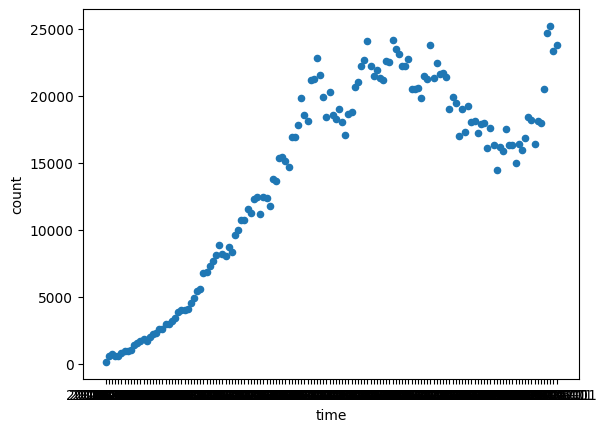

In [60]:
new_data.plot(x='time', y='count', kind='scatter')
plt.show()

In [61]:
new_data

,time,count
2,2008-08-01,162
15,2008-09-01,640
32,2008-10-01,725
42,2008-11-01,579
47,2008-12-01,627
...,...,...
1929,2020-03-01,20483
1941,2020-04-01,24634
1954,2020-05-01,25196
1971,2020-06-01,23360


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

In [63]:
x_data_java = data[data["TagName"]=='java']['m']
x_data_python = data[data["TagName"]=='python']['m']
y_data_java = data[data["TagName"]=='java']['Unnamed: 2']
y_data_python = data[data["TagName"]=='python']['Unnamed: 2']


In [64]:
new_data_java = pd.DataFrame({'time': x_data_java, 'count': y_data_java})
new_data_python = pd.DataFrame({'time': x_data_python, 'count': y_data_python})

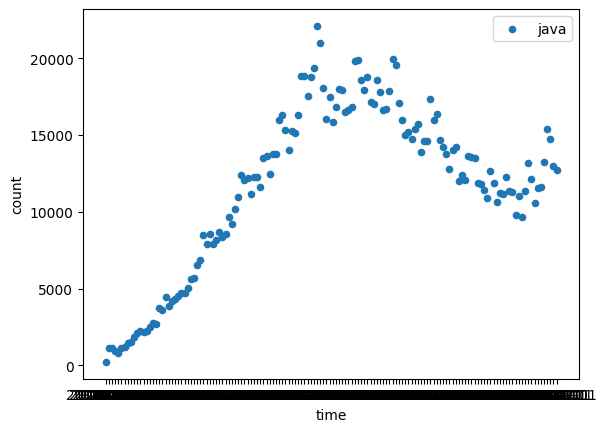

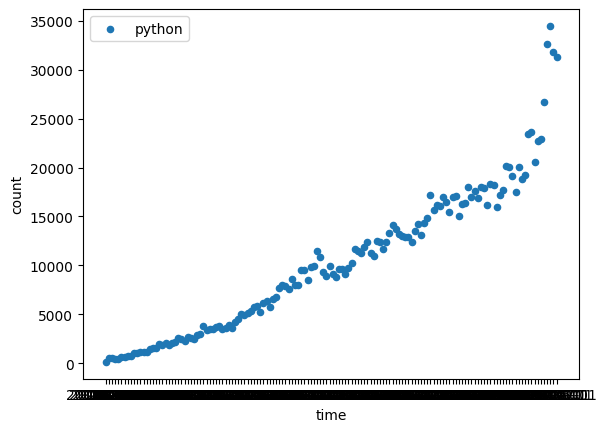

In [66]:
new_data_java.plot(x='time', y='count', kind='scatter', label='java')
new_data_python.plot(x='time', y='count', kind='scatter', label='python')
plt.show()

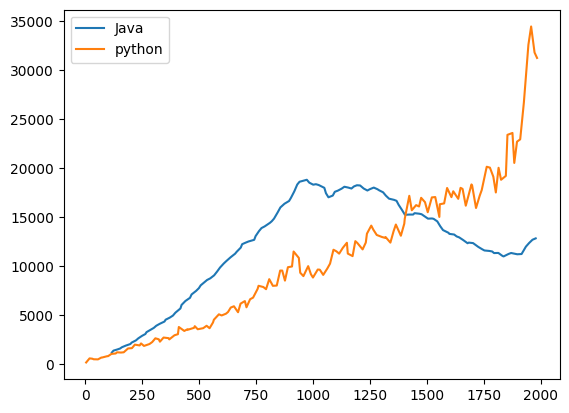

In [87]:
plt.plot(new_data_java['count'].rolling(10).mean(), label ='Java')
plt.plot(new_data_python['count'], label ='python')
plt.legend()
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [84]:
ch = new_data_java['count'].rolling(3).mean()

In [85]:
ch

8                NaN
16               NaN
25        837.333333
39       1082.666667
51        981.000000
            ...     
1921    12125.666667
1935    13410.666667
1949    14447.000000
1964    14367.666667
1978    13483.000000
Name: count, Length: 144, dtype: float64

In [107]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [108]:
test_df.pivot(index='Age', columns='Actor', values='Power')

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50
